Thursday, September 7, 2023

Running through the sample code found [here](https://pypi.org/project/DeepImageSearch/)

In [1]:
from DeepImageSearch import Load_Data, Search_Setup


In [2]:
imageFolder = '../FaceNetPyTorch/data/lfw/images'

In [3]:

# Load images from a folder
image_list = Load_Data().from_folder([imageFolder])

In [4]:
# Set up the search engine, You can load 'vit_base_patch16_224_in21k', 'resnet50' etc more then 500+ models 
st = Search_Setup(image_list=image_list, model_name='vgg19', pretrained=True, image_count=100)


 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19


In [5]:
%%time
# Index the images
st.run_index()


 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
 Meta data already Present, Please Apply Search!
['image_data_features.pkl', 'image_features_vectors.idx']
CPU times: user 303 ms, sys: 72.5 ms, total: 375 ms
Wall time: 1min 7s


In [6]:
# Get metadata
metadata = st.get_image_metadata_file()

In [12]:
# Add new images to the index
# st.add_images_to_index(['../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0001.jpg', '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0008.jpg'])


100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

 New images added to the index: 2


In [7]:
# Get similar images
searchImage = '../FaceNetPyTorch/data/test_images/angelina_jolie/1.jpg'
st.get_similar_images(image_path=searchImage, number_of_images=10)


{1: '../FaceNetPyTorch/data/test_images/angelina_jolie/1.jpg',
 2: '../FaceNetPyTorch/data/test_images/paul_rudd/1.jpg',
 6: '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0008.jpg',
 4: '../FaceNetPyTorch/data/test_images/kate_siegel/1.jpg',
 3: '../FaceNetPyTorch/data/test_images/shea_whigham/1.jpg',
 5: '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0001.jpg',
 0: '../FaceNetPyTorch/data/test_images/bradley_cooper/1.jpg',
 -1: '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0008.jpg'}

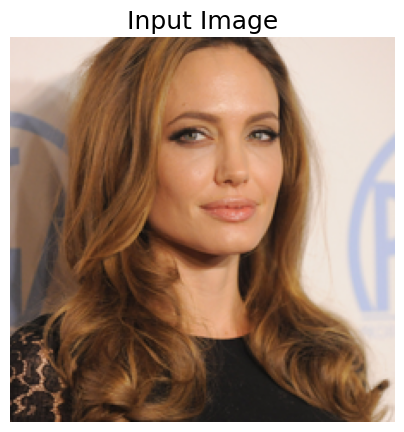

IndexError: list index out of range

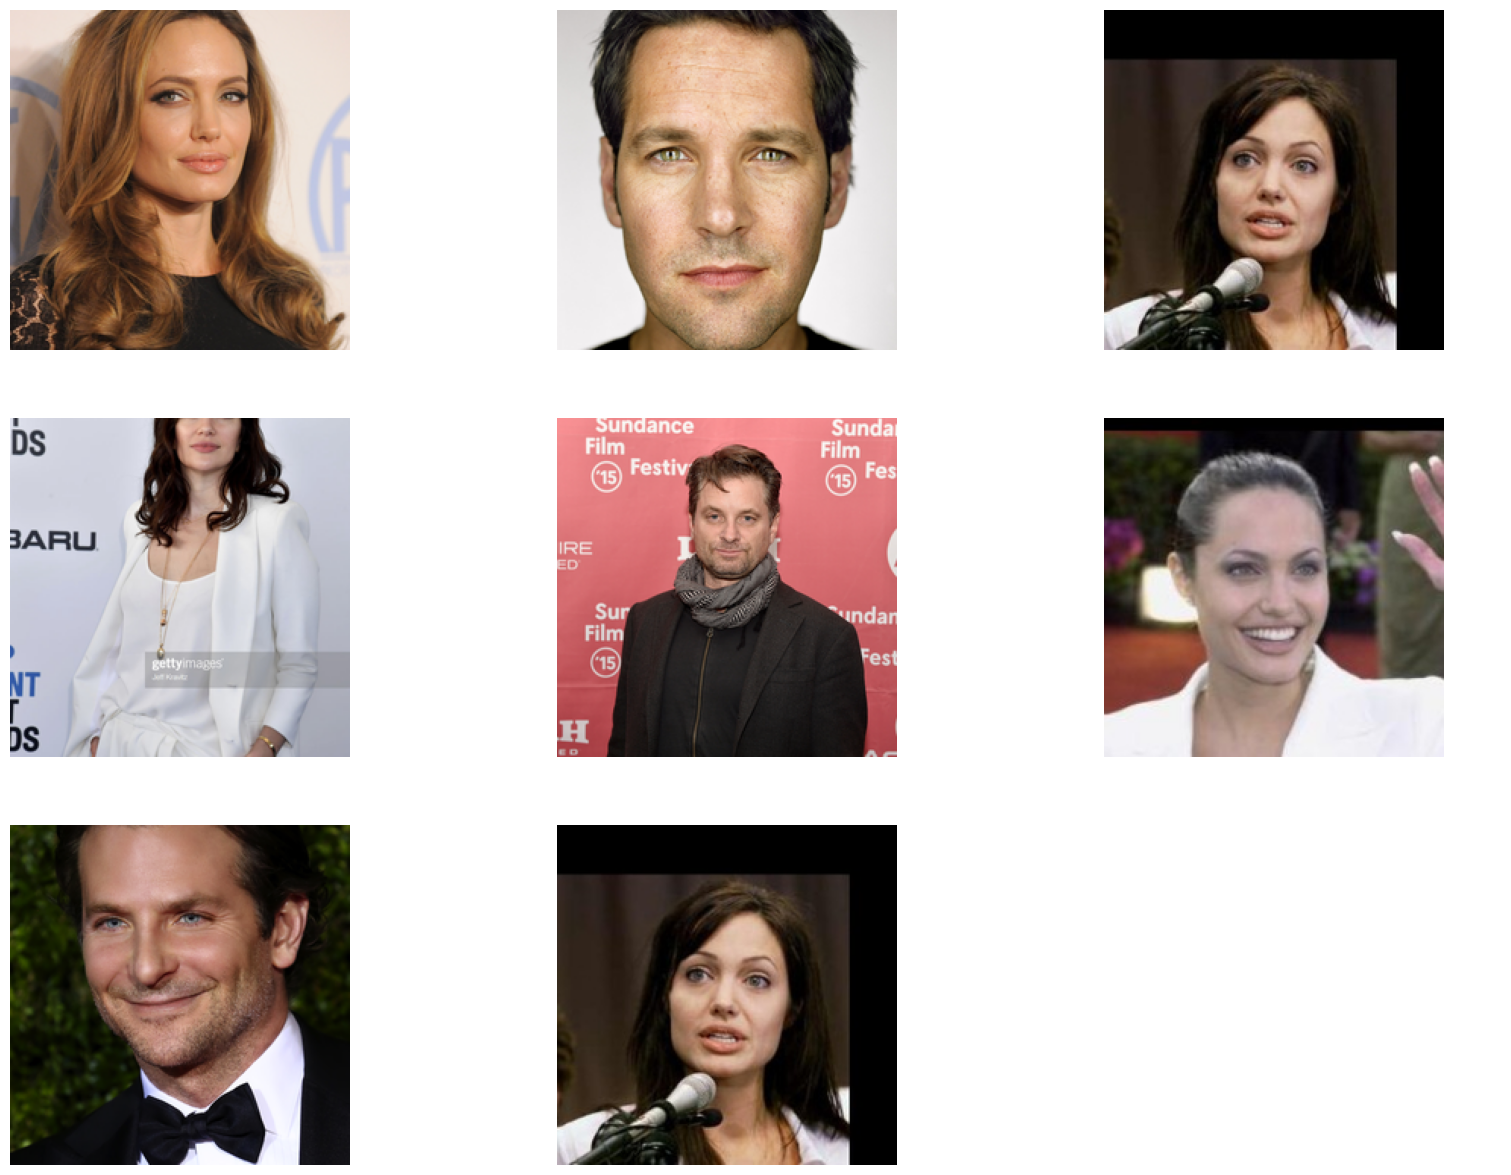

In [8]:
# Plot similar images
st.plot_similar_images(image_path=searchImage, number_of_images=9)
